<h3 style="color:#818A8A">1. Librerias</h3>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<h3 style="color:#818A8A">2. Diseños gráficos</h3>

In [2]:
mpl.rcParams ['axes.spines.bottom'] = True
mpl.rcParams ['axes.spines.left'] = True
mpl.rcParams ['axes.spines.right'] = True
mpl.rcParams ['axes.spines.top'] = True

<h3 style="color:#818A8A">3. Importación set de datos</h3>

In [10]:
credit = pd.read_excel ('credit.xlsx')
credit.drop(['Unnamed: 0'], axis=1, inplace=True)
credit.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


<h3 style="color:#818A8A">4. Análisis</h3>

In [12]:
credit.describe()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,...,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000
mean,165834.724541,1.580134,35.419866,0.004591,-0.136477,-0.151920,-0.249165,-0.259599,-0.282137,51199.401085,...,45511.918614,41544.281302,39992.825125,38797.298414,5548.942821,5220.050501,4855.443656,4891.429883,4984.977880,5149.928631
std,129493.683277,0.525593,9.452344,1.123473,1.207902,1.247411,1.176359,1.156723,1.181852,77872.623393,...,69632.762068,68117.135902,64327.134703,65468.199929,13701.948666,14616.927369,22156.285391,14252.068389,16896.223773,20076.659470
min,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,...,-9850.000000,-7905.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3125.000000,...,2296.750000,1856.000000,1524.000000,1012.000000,997.500000,588.000000,247.750000,240.000000,247.750000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21111.500000,...,19468.500000,17918.500000,17588.500000,15819.500000,2117.500000,2000.000000,1443.000000,1500.000000,1500.000000,1328.000000
75%,230000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62921.250000,...,56221.750000,49304.000000,48517.750000,47369.500000,5002.250000,4921.750000,4000.000000,4000.000000,4000.000000,4000.000000
max,1000000.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,964511.000000,...,548020.000000,891586.000000,927171.000000,961664.000000,239104.000000,285138.000000,896040.000000,205000.000000,332000.000000,528666.000000


In [14]:
bins = np.linspace(21,75,12)
bins

array([21.        , 25.90909091, 30.81818182, 35.72727273, 40.63636364,
       45.54545455, 50.45454545, 55.36363636, 60.27272727, 65.18181818,
       70.09090909, 75.        ])

In [16]:
groupNames = ["21-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75"]
credit['AGE_BINS'] = pd.cut(credit["AGE"], bins, labels = groupNames, include_lowest=True)

<h3 style="color:#818A8A">5. Gráficos</h3>

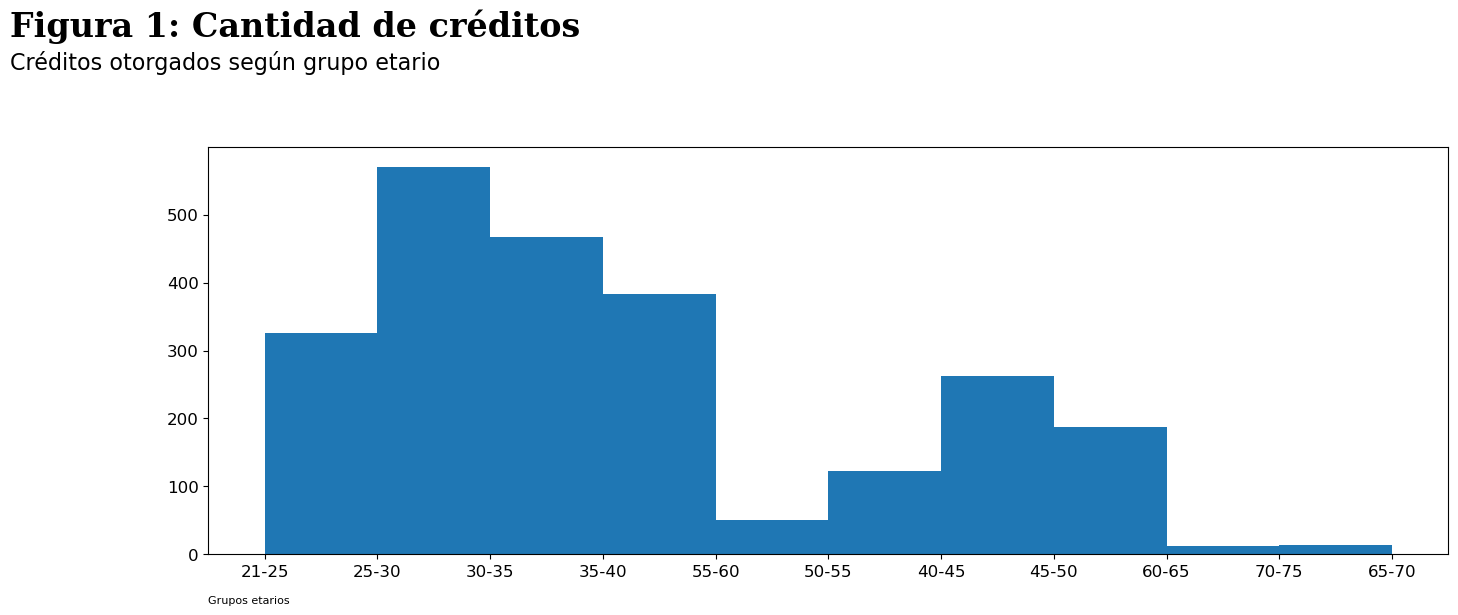

In [35]:
fig,ax = plt.subplots (1, 1, figsize = (16, 6.9), dpi = 100)

plt.hist (credit ['AGE_BINS'])

# Formato del gráfico
# Título y subtítulo del gráfico

title_t = 'Figura 1: Cantidad de créditos'
ax.set_title (title_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.86,
              transform = fig.transFigure,
              fontsize = 24,
              fontweight = 'bold',
              fontfamily = 'serif')

subtitle_t = 'Créditos otorgados según grupo etario'
plt.suptitle (subtitle_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.84,
              transform = fig.transFigure,
              fontsize = 16,
              fontweight = 'regular',
              fontfamily = 'sans')

# Etiquetas de eje X y Y

label = 'Grupos etarios'
ax.set_xlabel (label,
               ha = 'left',
               fontsize = 8,
               fontweight = 'regular',
               fontfamily = 'sans')

ax.xaxis.set_label_coords (x = 0,
                           y = -0.10,
                           transform = ax.transAxes)

ax.tick_params (axis = 'both',
                labelsize = 12)

plt.subplots_adjust (top = 0.70)
plt.show ()

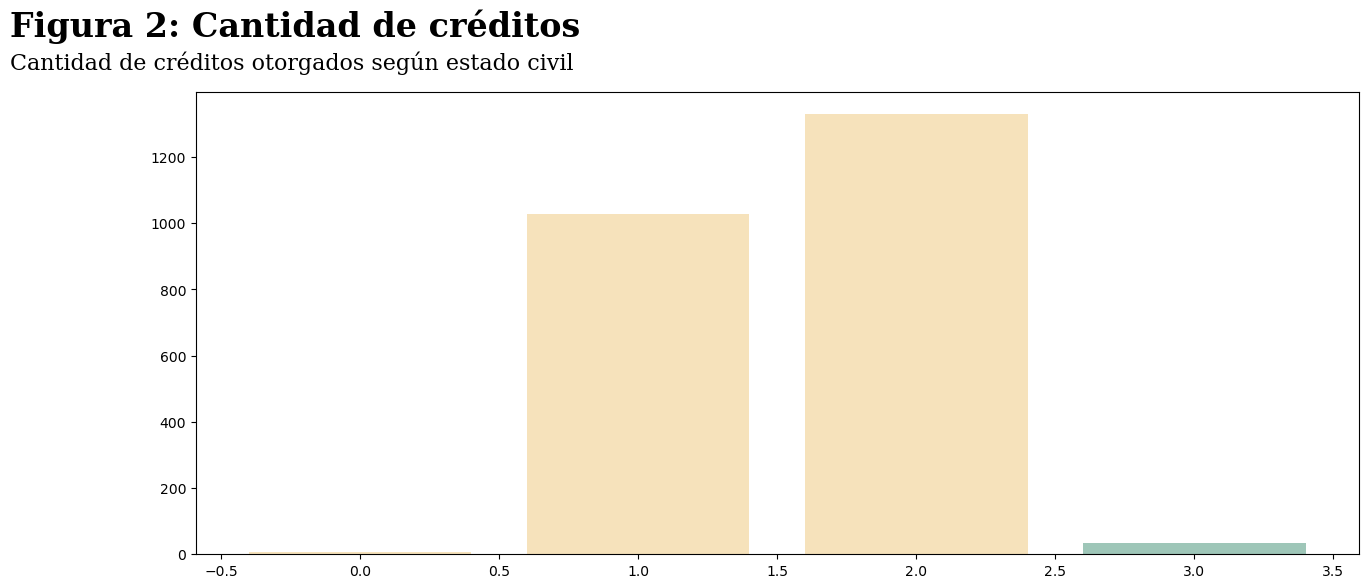

,LIMIT_BAL
MARRIAGE,
2,1330
1,1027
3,33
0,6


In [37]:
fig,ax = plt.subplots (1, 1, figsize = (15, 6.9), dpi = 100)

estCivil = dfGraf.index.tolist ()
counts = dfGraf ['LIMIT_BAL'].tolist ()

bar_colors = ["#f6e2bb", "#f6e2bb", "#9ec6b8", "#f6e2bb"]
ax.bar (estCivil, counts, label = 'Estado civil', color = bar_colors)

# Formato del gráfico
# Título y subtítulo del gráfico

title_t = 'Figura 2: Cantidad de créditos'
ax.set_title (title_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.86,
              transform = fig.transFigure,
              fontsize = 24,
              fontweight = 'bold',
              fontfamily = 'serif')

subtitle_t = 'Cantidad de créditos otorgados según estado civil'
plt.suptitle (subtitle_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.84, 
              transform = fig.transFigure,
              fontsize = 16,
              fontweight = 'regular',
              fontfamily = 'serif')

plt.subplots_adjust (top = 0.78)
plt.show ()

# Cantidad de registros según marca y se agrupan
dfGraf = credit.groupby (['MARRIAGE']).count ()

# Selección de índice y primera columna
dfGraf = dfGraf.iloc [:, :1]

# Se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values ('LIMIT_BAL', ascending = False)

# Muestreo del Dataframe para graficarlo
dfGraf

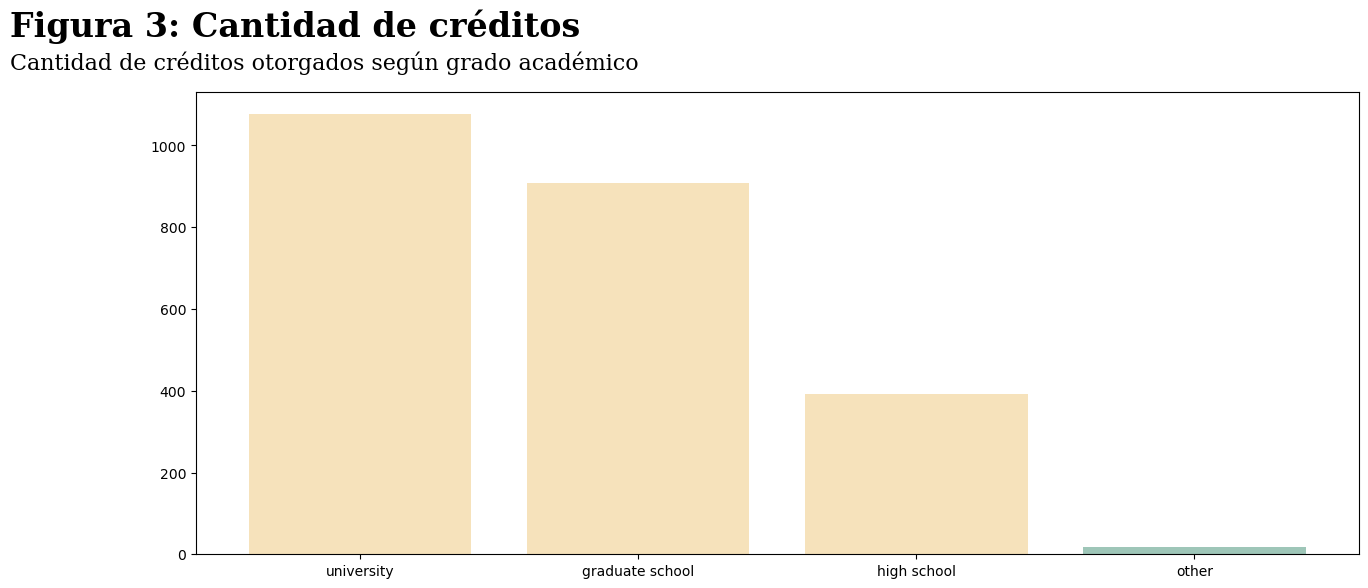

,LIMIT_BAL
EDUCATION,
university,1077
graduate school,909
high school,392
other,18


In [39]:
fig,ax = plt.subplots (1, 1,figsize = (15, 6.9), dpi = 100)

educacion = dfGraf.index.tolist()
counts = dfGraf ['LIMIT_BAL'].tolist()

bar_colors = ["#f6e2bb", "#f6e2bb", "#f6e2bb", "#9ec6b8"]
ax.bar (educacion, counts, label = "Grado Académico", color = bar_colors)

# Formato del gráfico
# Título y subtítulo del gráfico

title_t = "Figura 3: Cantidad de créditos"
ax.set_title (title_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.86,
              transform = fig.transFigure,
              fontsize = 24,
              fontweight = "bold",
              fontfamily = "serif")

subtitle_t = 'Cantidad de créditos otorgados según grado académico'
plt.suptitle (subtitle_t,
              horizontalalignment = "left",
              x = 0.001,
              y = 0.84,
              transform = fig.transFigure,
              fontsize = 16,
              fontweight = "regular",
              fontfamily = "serif")


plt.subplots_adjust (top = 0.78)
plt.show()

# Cantidad de registros según marca y se agrupan
dfGraf = credit.groupby (['EDUCATION']).count ()

# Selección de índice y primera columna
dfGraf = dfGraf.iloc [:, :1]

# Se ordenan los datos de menor a mayor
dfGraf = dfGraf.sort_values ('LIMIT_BAL', ascending = False)

# Muestreo del Dataframe para graficarlo
dfGraf

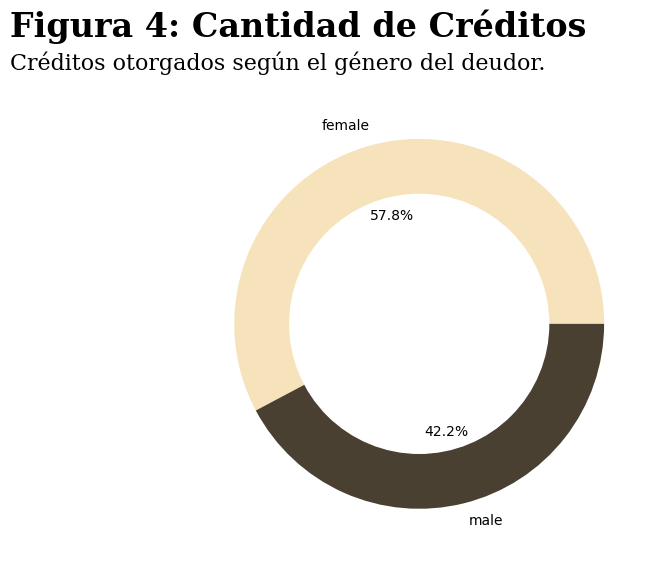

,LIMIT_BAL
SEX,
female,1384
male,1012


In [41]:
names = dfGraf.index.tolist()
style = dfGraf ['LIMIT_BAL'].tolist()
fig,ax = plt.subplots (1, 1, figsize = (8, 6.9), dpi = 100)

# Este circulo es la base del grafico de anillos
circulo = plt.Circle ((0, 0), 0.7, color = "white")  

plt.pie (style, 
         labels = names, 
         autopct = '%1.1f%%', 
         colors = ['#f6e2bb','#4a4031'])


# Formato del gráfico
# Título y subtítulo del gráfico

title_t = "Figura 4: Cantidad de Créditos"
ax.set_title (title_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.86,
              transform = fig.transFigure,
              fontsize = 24,
              fontweight = "bold",
              fontfamily = "serif")

subtitle_t = 'Créditos otorgados según el género del deudor.'
plt.suptitle (subtitle_t,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.84,
             transform = fig.transFigure,
             fontsize = 16,
             fontweight = "regular",
             fontfamily = "serif")

plt.subplots_adjust (top = 0.78)

p = plt.gcf ()
p.gca ().add_artist (circulo)
plt.show ()

# Cantidad de registros según marca y se agrupan
dfGraf = credit.groupby (['SEX']).count ()

# Selección de índice y primera columna
dfGraf = dfGraf.iloc [:, :1]

# Se ordenan los datos de menor a mayor
dfGraf = dfGraf.sort_values ('LIMIT_BAL', ascending = False)

# Muestreo del Dataframe para graficarlo
dfGraf

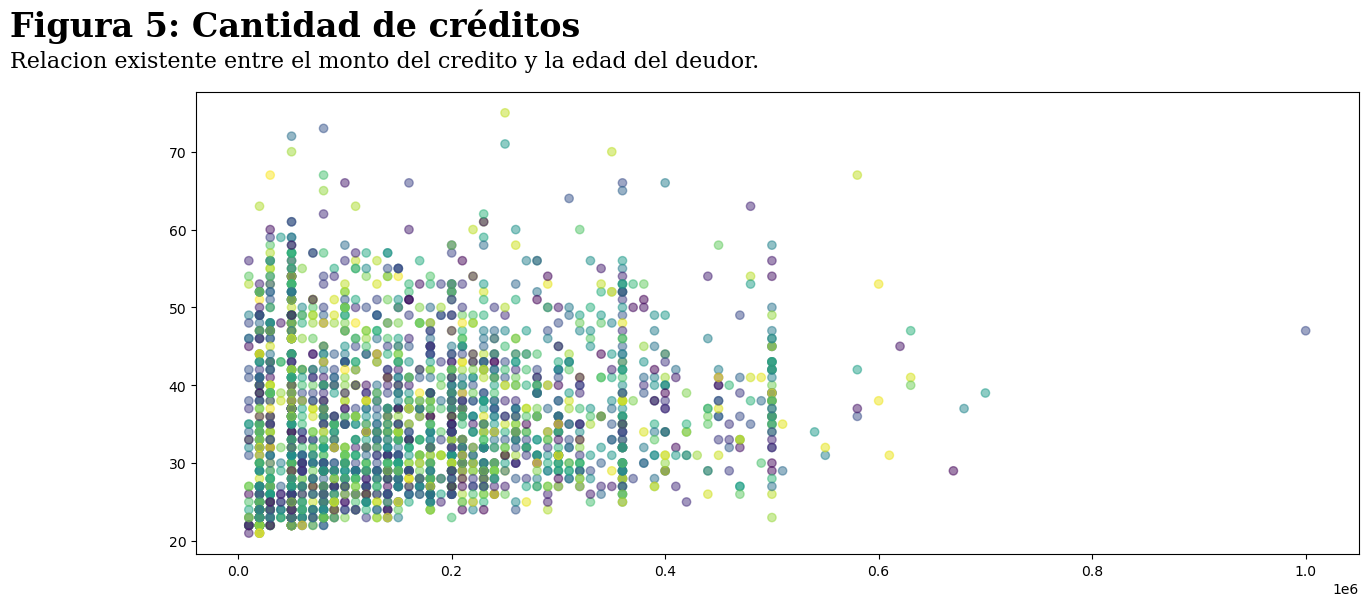

In [42]:
fig,ax = plt.subplots (1, 1, figsize = (15, 6.9), dpi = 100)

colors = np.random.rand (2396)
ax.scatter (credit ['LIMIT_BAL'], credit ['AGE'],  c = colors, alpha = 0.5)


# Formato del gráfico
# Título y subtítulo del gráfico

title_t = "Figura 5: Cantidad de créditos"
ax.set_title (title_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.86,
              transform = fig.transFigure,
              fontsize = 24,
              fontweight = "bold",
              fontfamily = "serif")

subtitle_t = 'Relacion existente entre el monto del credito y la edad del deudor.'
plt.suptitle (subtitle_t,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.84,
             transform = fig.transFigure,
             fontsize = 16,
             fontweight = "regular",
             fontfamily = "serif")


plt.subplots_adjust (top = 0.78)
plt.show ()